EN2550 Assignment 1
Index : 190557V
Name : K.G.C.P.Sandaruwan

(1)

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

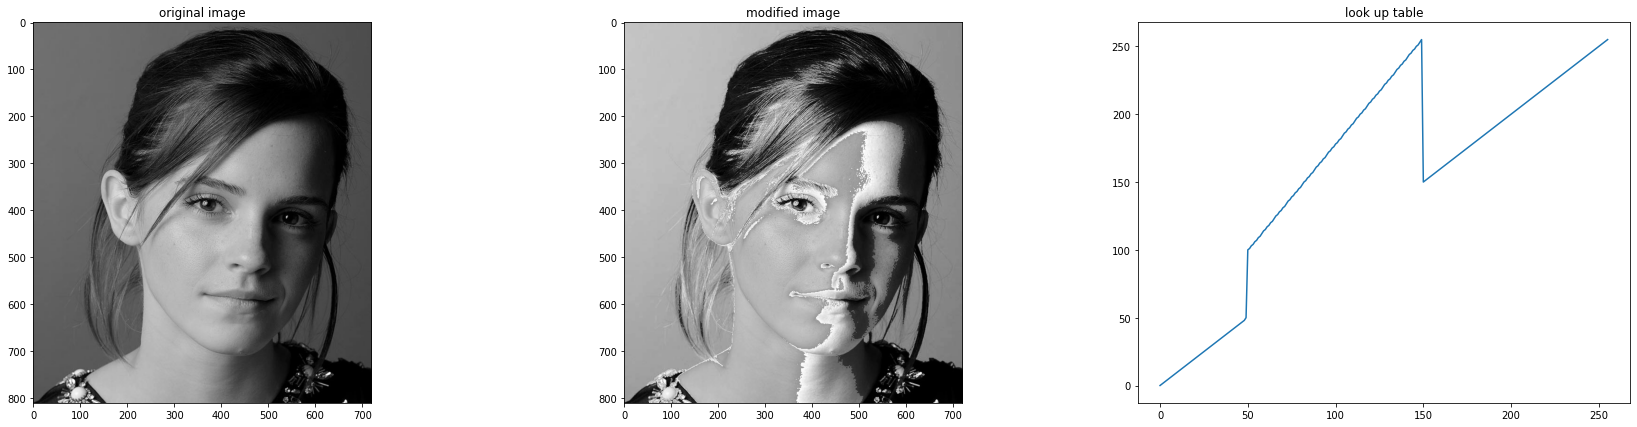

In [19]:
emma=cv.imread("emma_gray.jpg")
assert emma is not None
t1 = np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)
table=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
#modified=cv.LUT(emma,table)

emma=cv.cvtColor(emma,cv.COLOR_BGR2RGB)
modified=cv.LUT(emma,table)
modified=cv.cvtColor(modified,cv.COLOR_BGR2RGB)
fig,ax=plt.subplots(1,3)
fig.set_figwidth(30)
fig.set_figheight(7)
ax[0].imshow(emma)
ax[0].set_title("original image")
ax[1].set_title("modified image")
ax[2].set_title("look up table")
#plt.axis("off")



(2)

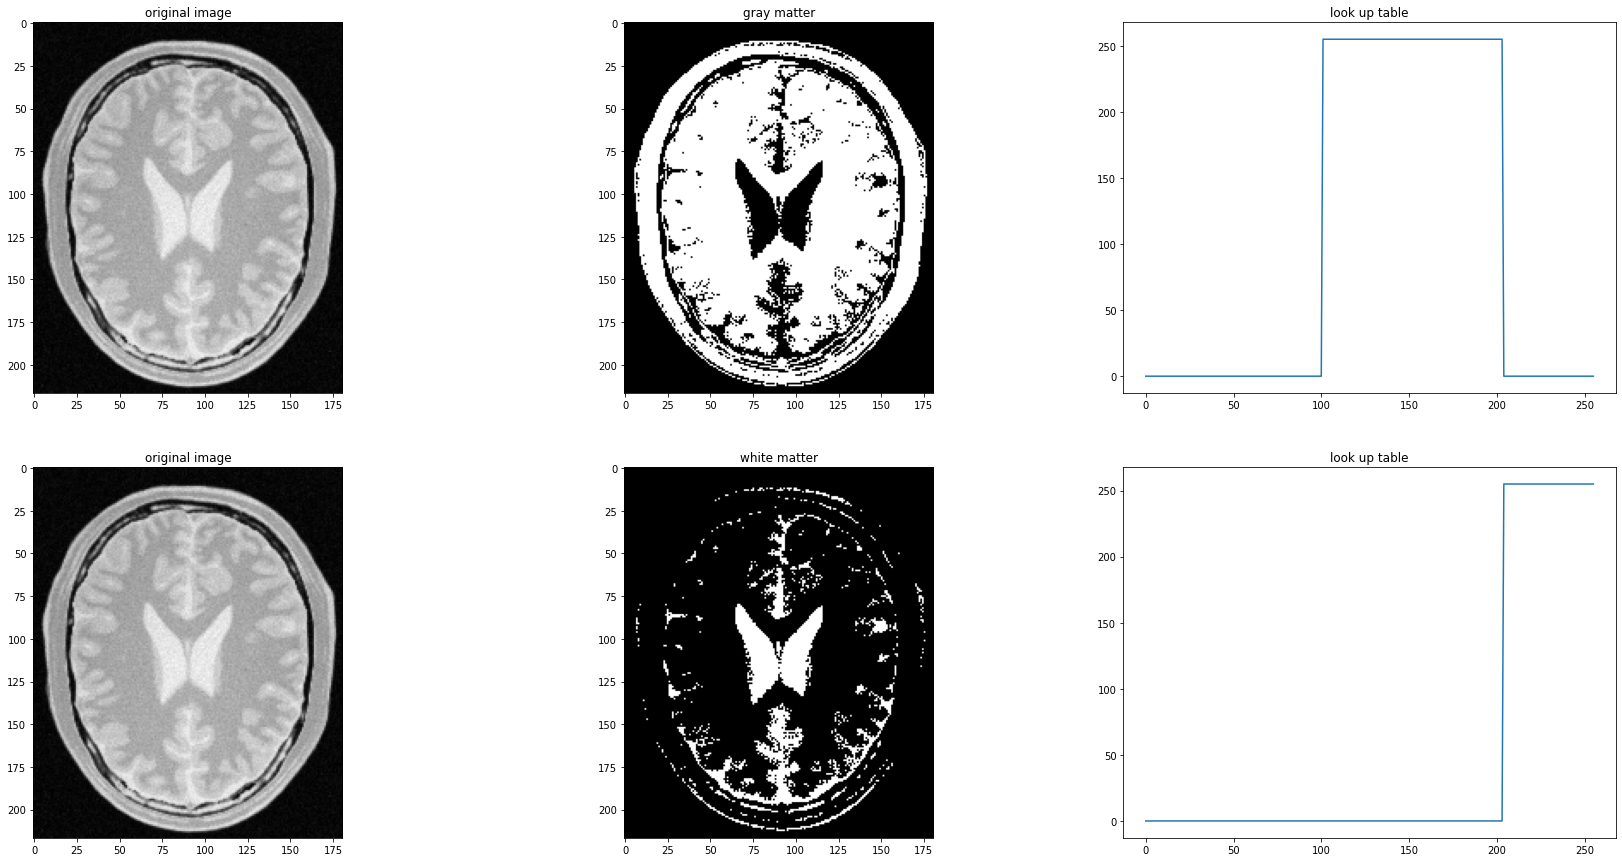

In [24]:
# 101-204 gray matter
# 204-256 white matter
brain=cv.imread("brain_proton_density_slice.png")
brain=cv.cvtColor(brain,cv.COLOR_BGR2RGB)
g1=np.linspace(0,0,101)
g2=np.linspace(255,255,103)
g3=np.linspace(0,0,52)
table_gm=np.concatenate((g1,g2,g3),axis=0).astype(np.uint8)
w1=np.linspace(0,0,204)
w2=np.linspace(255,255,52)
table_wm=np.concatenate((w1,w2),axis=0).astype(np.uint8)
grayMatter=cv.LUT(brain,table_gm)
whiteMatter=cv.LUT(brain,table_wm)
#brain=cv.cvtColor(brain,cv.COLOR_BGR2RGB)
fig,ax=plt.subplots(2,3)
fig.set_figwidth(30)
fig.set_figheight(15)
ax[0][0].set_title("original image")
ax[0][1].set_title("gray matter")
ax[0][2].set_title("look up table")
ax[0][0].imshow(brain)
ax[0][1].imshow(grayMatter)
ax[0][2].plot(table_gm)
ax[1][0].set_title("original image")
ax[1][1].set_title("white matter")
ax[1][2].set_title("look up table")
ax[1][0].imshow(brain)
ax[1][1].imshow(whiteMatter)
ax[1][2].plot(table_wm)
plt.show()


(3)